/tmp/ipykernel_145023/2971276778.py:10: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt('US-pres-elections.csv', delimiter=',', names=True, dtype=None)


Dominant frequency
0.12244897959183673
Spectrum Index
1
Dominant frequency Optimized
0.1476944340227611


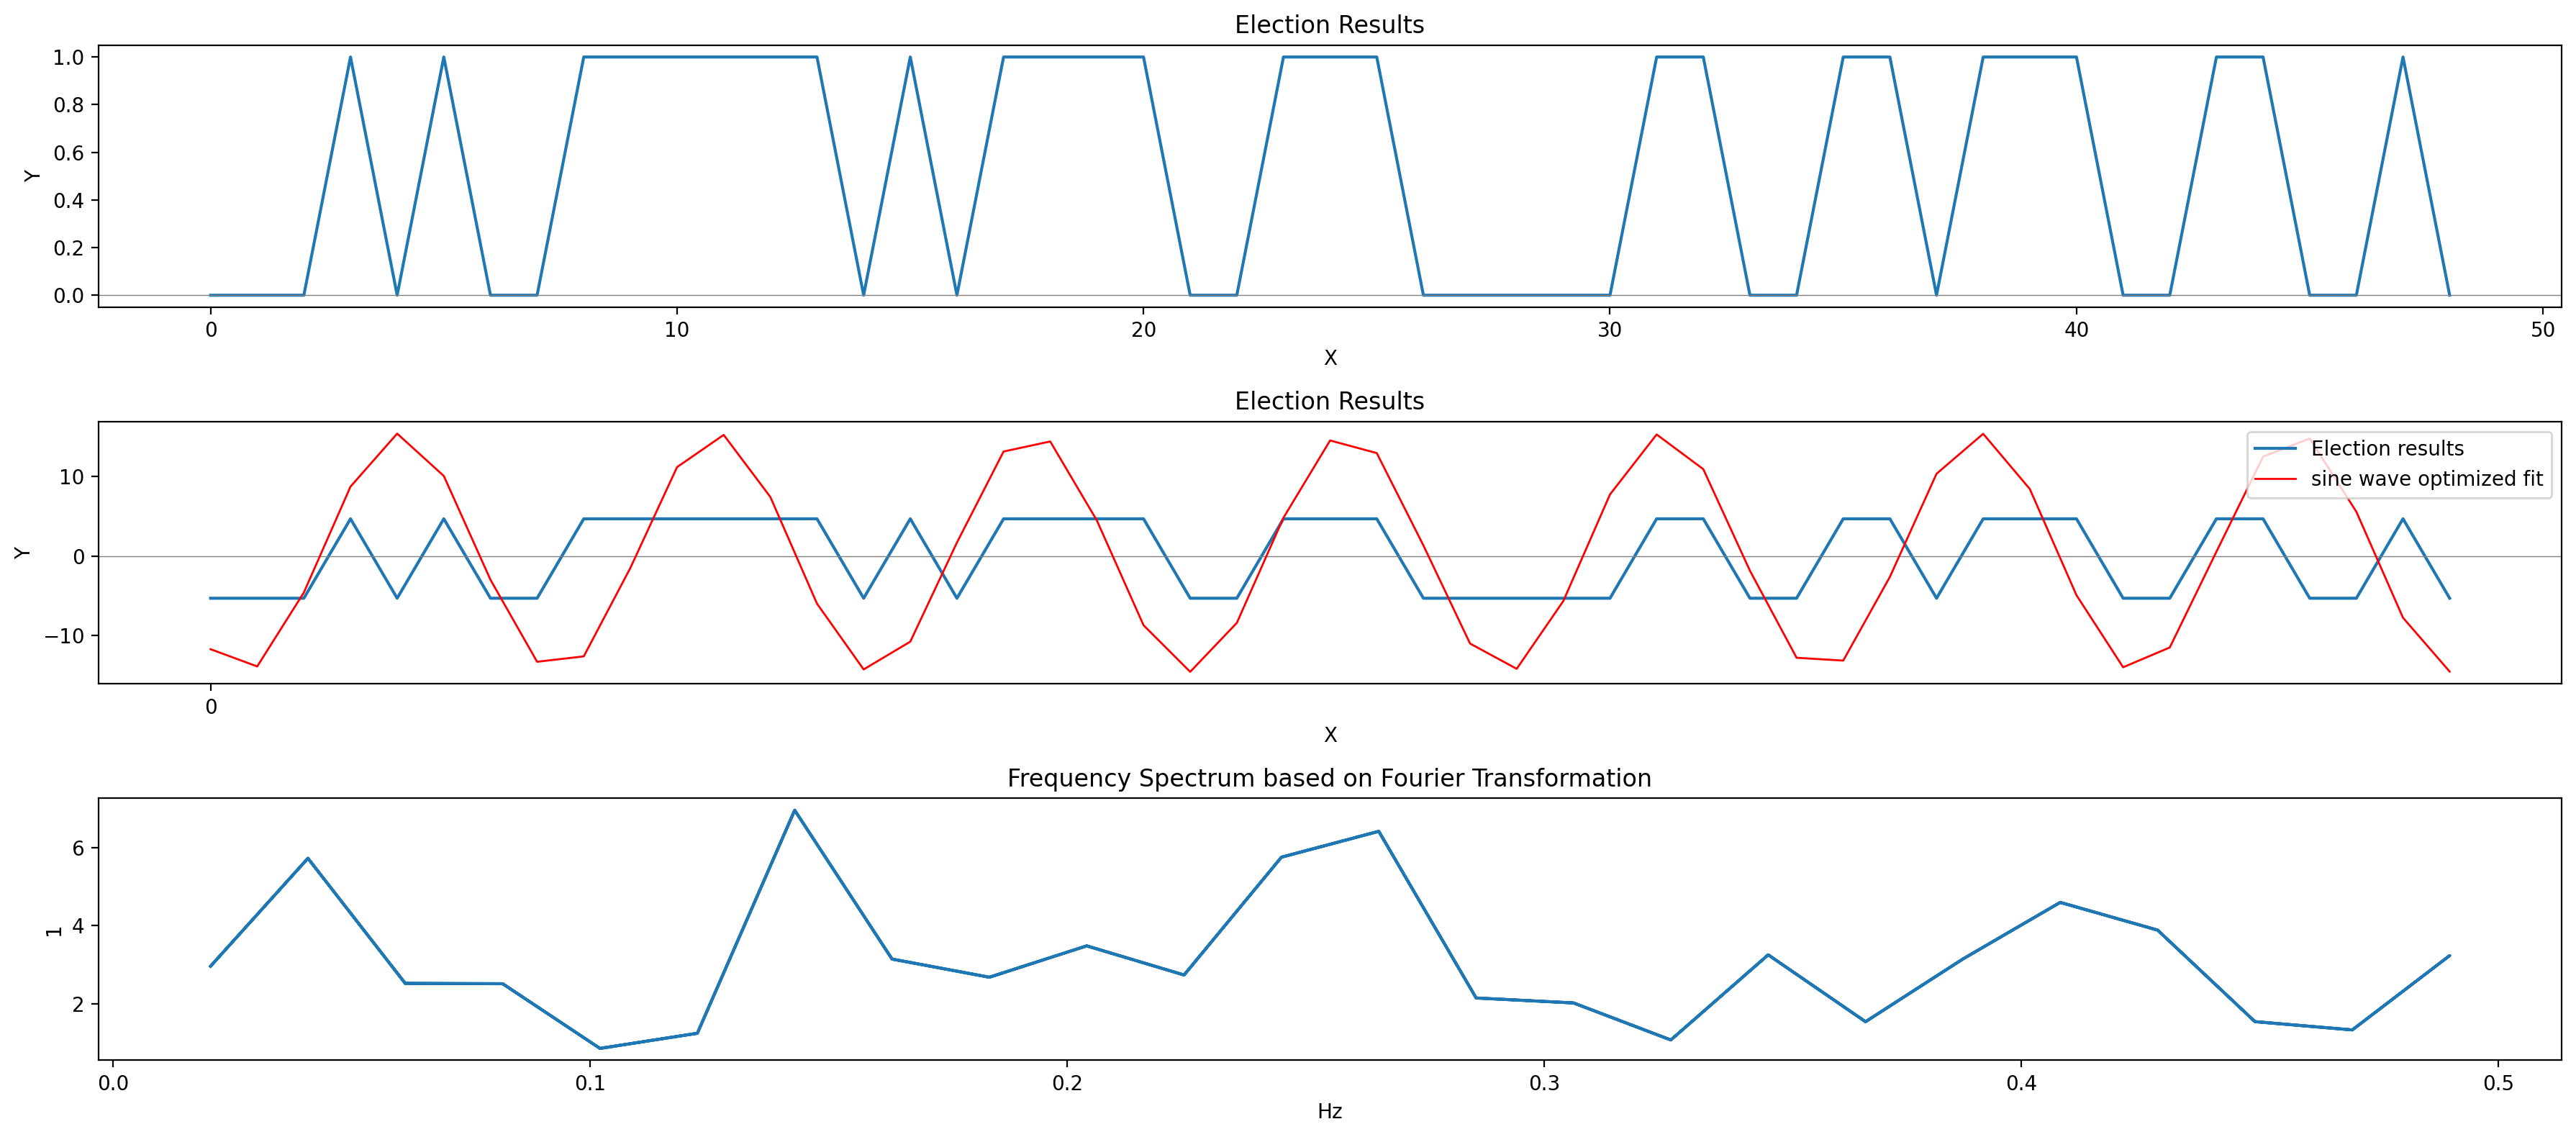

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import scipy.optimize
import sys
from datetime import datetime

str2date = lambda x: datetime.strptime(x.decode("utf-8"), '%Y-%m-%d')
str2str = lambda x: x
data = np.genfromtxt('US-pres-elections.csv', delimiter=',', names=True, dtype=None)
dates = data['date']
values = data['value']
 # Convert dates to datetime objects
dates = np.array([np.datetime64(date) for date in dates])

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

np.set_printoptions(threshold=sys.maxsize)

# np.random.seed(98)

samping_frequency = 1
samples = 360 * 3 * samping_frequency
samples = len(values)

xs = np.arange(len(dates))
ys = values

window_size = 1
ys_transformed = np.convolve(ys, np.ones(window_size, dtype=float), 'valid') # Sliding window
ys_transformed = np.resize(ys_transformed, samples)

fit_amp = np.std(ys_transformed) * 2.**0.5

offset = ys_transformed.mean()
#offset = 0

fft_fre = np.fft.fftfreq(n=xs.size, d=1/samping_frequency)
fft_res = np.fft.fft(ys)

freq_band_sub_section_range = int(len(fft_res) / 15)
dominant_freq = abs(fft_fre[np.argmax(np.abs(fft_res[1:]))])
print("Dominant frequency")
print(dominant_freq)
print("Spectrum Index")
print(np.argmax(np.abs(fft_res[1:freq_band_sub_section_range])))

plt.subplots(figsize=(18,8))
plt.subplot(3,1,1)
plt.plot(xs, ys)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f'Election Results')
#plt.xticks(np.arange(min(xs), max(xs)+1, 100.0 * samping_frequency))
plt.axhline(linewidth=0.5, color='gray')

plt.subplot(3,1,2)
transformed_plot = plt.plot(xs, 10 *(ys_transformed - offset), label="Election results")
plt.axhline(linewidth=0.5, color='gray')

fit = fit_amp * np.sin(2. * np.pi * dominant_freq * xs / samping_frequency)

guess = np.array([fit_amp, 2.*np.pi*dominant_freq, 0., offset])
def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
popt, pcov = scipy.optimize.curve_fit(sinfunc, xs, ys, p0=guess)
A, w, p, c = popt

fit_opt = 50 * A * np.sin(w*xs + p) + c

print("Dominant frequency Optimized")
print(w / (2. *  np.pi))

offset_fit = fit.mean()
offset_fit_opt = fit_opt.mean()
fit = fit - offset_fit
fit_opt = fit_opt - offset_fit_opt

fit_opt_plot = plt.plot(xs, fit_opt, "r-", label="sine wave optimized fit", linewidth=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f'Election Results')
plt.xticks(np.arange(min(xs), max(xs)+1, 100.0 * samping_frequency))

plt.legend()

plt.subplot(3,1,3)
plt.plot(abs(fft_fre[1:]), np.abs(fft_res[1:]))
plt.title("Frequency Spectrum based on Fourier Transformation")
plt.xlabel("Hz")
plt.ylabel("1")

plt.tight_layout()
plt.show()
